## SECTION 1 DATA UNDERSTANDING

In [260]:
!pip install streamlit_folium
!pip install folium
!pip install geopy
!pip install plotly
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading playoffs data - NPRI_Data_2022_unclean

df = pd.read_csv('CBB_Listings.csv')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)


In [261]:
#1.Data understanding
#Observing Data (Data size,shape,features)
"""  Data description and data Understanding
#a.	Data shape,size (rows, columns)
#d.	Basic descriptive statistics (mean, median, variance) and their use
#e.	Focus on which attributes are important."""

print (df.describe(include="all"))

                                  listing_id  \
count                                 145114   
unique                                145114   
top     f5b663d2-4896-11ef-a15b-8b4423f1ff08   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                          listing_heading listing_type  \
count                              141099       145114   
unique                              73297            2   
top     2024 Ford F-150 XLT SuperCrew 4WD         Sold   
freq                                  475        98130   
mean                                  NaN          NaN   
std                                   NaN          NaN   
min              

In [262]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          141099 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  dealer_url               145114 non-null  object 
 13  dealer_email             0 non-null       float64
 14  deal

listing_id  \
145109  8c4d2cd4-db92-11ee-ab06-77676d6b474c   
145110  8b564927-db92-11ee-8456-d37a8da2f6cb   
145111  474ecb38-0c14-11ef-a6d5-81e7286561b2   
145112  7208325d-e725-11ee-bf7d-151c90416979   
145113  70f556a5-6bff-4836-97cc-c859d6b88f15   

                                          listing_heading listing_type  \
145109  2024 Volvo XC90 Recharge T8 Ultimate Bright Th...         Sold   
145110  2024 Volvo XC90 Recharge T8 Ultimate Bright Th...         Sold   
145111  2024 Volvo XC90 Recharge T8 Ultimate Bright Th...         Sold   
145112  2024 Volvo XC90 Recharge T8 eAWD PHEV Ultimate...         Sold   
145113  Pre-Owned 2024 Volvo XC90 Recharge Plug-In Hyb...         Sold   

                                              listing_url listing_first_date  \
145109  https://www.volvocarsedmonton.com/inventory/ne...      3/5/2024 0:00   
145110  https://www.volvocarsedmonton.com/inventory/ne...      3/5/2024 0:00   
145111  https://www.volvocarsedmonton.com/inventory/ne...      5/6/2024 0:00   
145112  https://www.volvocarsedmonton.com/inventory/ne...     3/20/2024 0:00   
145113  https://www.southgateaudi.com/used/Volvo/2024-...     7/20/2024 0:00   

        days_on_market  dealer_id          dealer_name       dealer_street  \
145109              99   11132447  Volvo Cars Edmonton      1205 101 St SW   
145110              96   11132447  Volvo Cars Edmonton      1205 101 St SW   
145111              22   11132447  Volvo Cars Edmonton      1205 101 St SW   
145112              71   11132447  Volvo Cars Edmonton      1205 101 St SW   
145113               4   11204118       Southgate Audi  1235 101 Street SW   

       dealer_city dealer_province dealer_postal_code             dealer_url  \
145109    Edmonton              AB            T6X 1A1  volvocarsedmonton.com   
145110    Edmonton              AB            T6X 1A1  volvocarsedmonton.com   
145111    Edmonton              AB            T6X 1A1  volvocarsedmonton.com   
145112    Edmonton              AB            T6X 1A1  volvocarsedmonton.com   
145113    Edmonton              AB            T6X 1A1      southgateaudi.com   

        dealer_email  dealer_phone dealer_type stock_type  vehicle_id  \
145109           NaN  888-486-5100           I        NEW      574294   
145110           NaN  888-486-5100           I        NEW      574294   
145111           NaN  888-486-5100           I       USED      574294   
145112           NaN  888-486-5100           I        NEW      574294   
145113           NaN  780-462-2834           F       USED      574294   

                      vin         uvc  mileage   price   msrp  model_year  \
145109  YV4H60CF6R1219373  2024960423       30  105781  94500        2024   
145110  YV4H60CF9R1197899  2024960423       30  105990  94500        2024   
145111  YV4H60CF0R1160563  2024960423     2454  108201  94500        2024   
145112  YV4H60CF0R1160563  2024960423     2454  108201  94500        2024   
145113  YV4H60CF4R1163014  2024960423     9333       0  94500        2024   

         make model             series           style  certified  \
145109  Volvo  XC90  Recharge Ultimate  4D Utility AWD          0   
145110  Volvo  XC90  Recharge Ultimate  4D Utility AWD          0   
145111  Volvo  XC90  Recharge Ultimate  4D Utility AWD          0   
145112  Volvo  XC90  Recharge Ultimate  4D Utility AWD          0   
145113  Volvo  XC90  Recharge Ultimate  4D Utility AWD          0   

        has_leather  has_navigation                 exterior_color  \
145109            0               0  Gray (platinum Grey Metallic)   
145110            0               0    Gray (vapour Grey Metallic)   
145111            0               0            Onyx Black Metallic   
145112            0               0            Onyx Black Metallic   
145113            0               0                            NaN   

       exterior_color_category                              interior_color  \
145109                    gray  Black (charcoal, Napp

In [263]:
df.shape

(145114, 46)

In [264]:
#2.Data issues detection
""" To check missing values data quality analysis:Issue Detection and pattern observed
       a. Missing values
       b. Inconsistent values
       c. Incorrect information due to data errors
       d. Duplicates
       e. Dropping uninformative features"""


' To check missing values data quality analysis:Issue Detection and pattern observed\n       a. Missing values\n       b. Inconsistent values\n       c. Incorrect information due to data errors\n       d. Duplicates\n       e. Dropping uninformative features'

In [265]:
df2 = df.copy()

df2.replace([' '],['NaN'],inplace = True)

In [266]:
df2.replace([' , '],['NaN'],inplace = True)
df2 = df.copy()

In [267]:
# Check duplicated
df2.duplicated().sum()

0

In [268]:
import numpy as np
import pandas as pd
from datetime import datetime
today = datetime.now()
df2['Age'] = today.year- df2['model_year']
df2.head()


listing_id                  listing_heading  \
0  f5b663d2-4896-11ef-a15b-8b4423f1ff08     1987 IROC Z  350 Auto T-Tops   
1  a9f565e6-4712-11ef-a23f-79dc25c5e601                              NaN   
2  03d18c58-253a-11ef-8f33-8905b4a2f000  1989 Cadillac DeVille Sedan FWD   
3  2d12630b-460e-11ee-89c4-e5b3161d4741  1989 Cadillac DeVille Sedan FWD   
4  53a8e550-47cd-11ef-8587-f926ecb61035  1989 Camaro IROC 350 Auto T-Top   

  listing_type                                        listing_url  \
0       Active  https://www.kijiji.ca/v-cars-trucks/edmonton/1...   
1         Sold  https://www.redlinemotors.ca/vehicle-details/1...   
2       Active  https://www.sweetheartmotor.com/cars/used/1989...   
3       Active  https://www.sweetheartmotor.com/cars/used/1989...   
4       Active  https://www.kijiji.ca/v-cars-trucks/edmonton/1...   

  listing_first_date  days_on_market  dealer_id  \
0     7/22/2024 0:00               9   11152931   
1     7/20/2024 0:00               4   11131329   
2      6/7/2024 0:00              54   11161704   
3     8/28/2023 0:00             338   11128265   
4     7/21/2024 0:00              10   11152931   

                               dealer_name             dealer_street  \
0  David T's Camaro & Firebird Auto Center           10611 201 St NW   
1                         Redlinemotors.Ca  14421 Mark Messier Trail   
2  Gateway Auto & Rv Sales & Financing Ltd      5404 Gateway Blvd NW   
3                            Credit Angels      5404 Gateway Blvd NW   
4  David T's Camaro & Firebird Auto Center           10611 201 St NW   

  dealer_city dealer_province dealer_postal_code           dealer_url  \
0    Edmonton              AB            T5S 1Y8            kijiji.ca   
1    Edmonton              AB            T6V 1H4     redlinemotors.ca   
2    Edmonton              AB            T6H 1B7  sweetheartmotor.com   
3    Edmonton              AB            T6H 1B7  sweetheartmotor.com   
4    Edmonton              AB            T5S 1Y8            kijiji.ca   

   dealer_email  dealer_phone dealer_type stock_type  vehicle_id  \
0           NaN  780-454-3330           I       USED       79126   
1           NaN  780-455-5919           I       USED       72277   
2           NaN  780-999-0055           I       USED       66755   
3           NaN  780-244-4999           I       USED       66755   
4           NaN  780-454-3330           I       USED       72366   

                 vin         uvc  mileage  price  msrp  model_year       make  \
0  1G1FP2189HN139203  1987160041   230860  11500     0        1987  Chevrolet   
1  1C3BF66P0JW113318  1988180016    48905   8700     0        1988   Chrysler   
2  1G6CD5157K4364083  1989140008   174640   6000     0        1989   Cadillac   
3  1G6CD5157K4364083  1989140008   174640   6000     0        1989   Cadillac   
4  1G1FP2185K2723911  1989160041   288000   8500     0        1989  Chevrolet   

          model    series     style  certified  has_leather  has_navigation  \
0        Camaro  Iroc Z28  2D Coupe          0            0               0   
1  Fifth Avenue       NaN  4D Sedan          0            0               0   
2       DeVille       NaN  4D Sedan          0            0               0   
3       DeVille       NaN  4D Sedan          0            0               0   
4        Camaro       Z28  2D Coupe          0            0               0   

  exterior_color exterior_color_category interior_color  \
0           Blue                    blue            NaN   
1            NaN                     NaN            NaN   
2           Pink                    pink            NaN   
3           Pink                    pink            NaN   
4          Other                     NaN            NaN   

  interior_color_category  price_analysis  wheelbase_from_vin  \
0                     NaN               0                 0.0   
1                     NaN               0                 0.0   
2                     NaN               0                

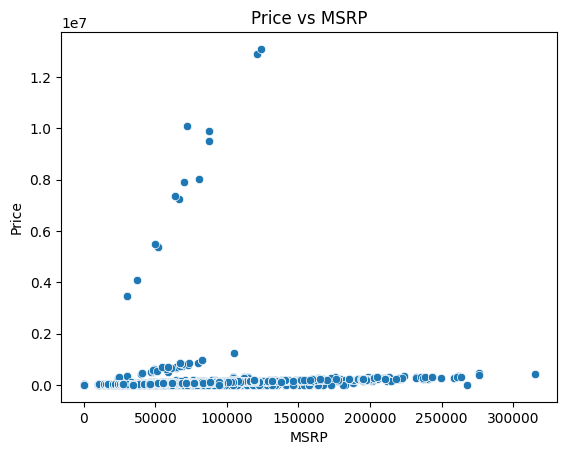

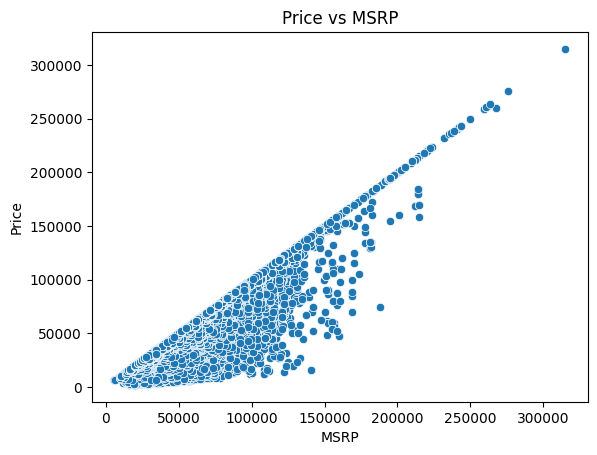

In [269]:
#Visualization before fixing price
sns.scatterplot(x='msrp', y='price', data=df2)
plt.title('Price vs MSRP')
plt.xlabel('MSRP')
plt.ylabel('Price')
plt.show()


# Fixing Price
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Replace MSRP values of 0 with corresponding price values
df2['msrp'] = np.where(df2['msrp'] == 0, df2['price'], df2['msrp'])

# Step 2: Cap prices greater than MSRP to MSRP
df2['price'] = np.where(df2['price'] > df2['msrp'], df2['msrp'], df2['price'])

# Step 3: Optionally, replace very low prices with the median price based on MSRP group
def fix_low_prices(row):
    if row['price'] < 0.1 * row['msrp']:
        median_price = df2[(df2['msrp'] > row['msrp'] * 0.9) & (df2['msrp'] < row['msrp'] * 1.1)]['price'].median()
        return median_price if not pd.isnull(median_price) else row['price']
    else:
        return row['price']

df2['price'] = df2.apply(fix_low_prices, axis=1)


# Step 4: Visualize the cleaned data (Price vs MSRP)
sns.scatterplot(x='msrp', y='price', data=df2)
plt.title('Price vs MSRP')
plt.xlabel('MSRP')
plt.ylabel('Price')
plt.show()


In [270]:
#Dropping msrp as it is not required now
df2.drop('msrp', axis=1, inplace=True)

In [271]:
# Fixing Transmission
df2['transmission_from_vin'].unique()
# The mapping for the transmission values
transmission_mapping = {
    '7': 'M',  # Convert '7' to 'M'
    '6': 'A',  # Convert '6' to 'A'
}

# Replacing the values in the transmission column
df2['transmission_from_vin'] = df2['transmission_from_vin'].replace(transmission_mapping)

# check unique values after conversion
print("Unique values in 'transmission' column after conversion:")
print(df2['transmission_from_vin'].unique())

Unique values in 'transmission' column after conversion:
['A' 'M']


In [272]:
#Drop uninformative features

# Create a list of columns to drop are in df2
cols_to_drop = ['dealer_email','dealer_id' , 'listing_first_date', 'days_on_market', 'dealer_type', 'dealer_street', 'series', 'dealer_url', 'exterior_color', 'interior_color', 'wheelbase_from_vin', 'listing_dropoff_date','listing_id','days_on_market', 'vehicle_id' , 'vin','certified', 'number_price_changes','price_history_delimited','location_score','price_analysis','listing_url','dealer_phone','Column1','uvc']

# Drop the columns that are present in df2
df2.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

# Check the remaining columns
remaining_columns = df2.columns
print(remaining_columns)

df2.head()

Index(['listing_heading', 'listing_type', 'dealer_name', 'dealer_city',
       'dealer_province', 'dealer_postal_code', 'stock_type', 'mileage',
       'price', 'model_year', 'make', 'model', 'style', 'has_leather',
       'has_navigation', 'exterior_color_category', 'interior_color_category',
       'drivetrain_from_vin', 'engine_from_vin', 'transmission_from_vin',
       'fuel_type_from_vin', 'distance_to_dealer', 'Age'],
      dtype='object')


listing_heading listing_type  \
0     1987 IROC Z  350 Auto T-Tops       Active   
1                              NaN         Sold   
2  1989 Cadillac DeVille Sedan FWD       Active   
3  1989 Cadillac DeVille Sedan FWD       Active   
4  1989 Camaro IROC 350 Auto T-Top       Active   

                               dealer_name dealer_city dealer_province  \
0  David T's Camaro & Firebird Auto Center    Edmonton              AB   
1                         Redlinemotors.Ca    Edmonton              AB   
2  Gateway Auto & Rv Sales & Financing Ltd    Edmonton              AB   
3                            Credit Angels    Edmonton              AB   
4  David T's Camaro & Firebird Auto Center    Edmonton              AB   

  dealer_postal_code stock_type  mileage    price  model_year       make  \
0            T5S 1Y8       USED   230860  11500.0        1987  Chevrolet   
1            T6V 1H4       USED    48905   8700.0        1988   Chrysler   
2            T6H 1B7       USED   174640   6000.0        1989   Cadillac   
3            T6H 1B7       USED   174640   6000.0        1989   Cadillac   
4            T5S 1Y8       USED   288000   8500.0        1989  Chevrolet   

          model     style  has_leather  has_navigation  \
0        Camaro  2D Coupe            0               0   
1  Fifth Avenue  4D Sedan            0               0   
2       DeVille  4D Sedan            0               0   
3       DeVille  4D Sedan            0               0   
4        Camaro  2D Coupe            0               0   

  exterior_color_category interior_color_category drivetrain_from_vin  \
0                    blue                     NaN                 RWD   
1                     NaN                     NaN                 RWD   
2                    pink                     NaN                 FWD   
3                    pink                     NaN                 FWD   
4                     NaN                     NaN                 RWD   

  engine_from_vin transmission_from_vin fuel_type_from_vin  \
0    5.7L V8 TBI                      A                Gas   
1        5.2L V8                      A                Gas   
2     4.5L V8 DI                      A                Gas   
3     4.5L V8 DI                      A                Gas   
4    5.7L V8 TBI                      A                Gas   

   distance_to_dealer  Age  
0                9.84   37  
1                8.30   36  
2                5.71   35  
3                5.71   35  
4                9.84   35

In [273]:
#Check missing values and number of columns
print(df2.shape)
df2.isnull().sum()


(145114, 23)


listing_heading             4015
listing_type                   0
dealer_name                    0
dealer_city                    0
dealer_province                0
dealer_postal_code             0
stock_type                     0
mileage                        0
price                          0
model_year                     0
make                           0
model                          0
style                          0
has_leather                    0
has_navigation                 0
exterior_color_category    34947
interior_color_category    58781
drivetrain_from_vin            0
engine_from_vin                0
transmission_from_vin          0
fuel_type_from_vin             0
distance_to_dealer             0
Age                            0
dtype: int64

In [274]:
#Data preparation: Ways of handling observed problems
"""Data preparation:
Ways of handling observed problems and data wrangling

a.	Managing missing values (remove rows, impute missing values) under different cases:
                1.Categorical data (using "Mode")
                2.Time series caseses(using "NOCF and NOCB")
                3.Numerical features (using "Mean")
b.	Managing data inconsistencies (delete rows, attributes, fix inconsistencies)
c.	Correct inappropriate metadata and annotations
d.	Arranging and formatting data into necessary formats (CSV)"""


'Data preparation:\nWays of handling observed problems and data wrangling\n\na.\tManaging missing values (remove rows, impute missing values) under different cases:\n                1.Categorical data (using "Mode")\n                2.Time series caseses(using "NOCF and NOCB")\n                3.Numerical features (using "Mean")\nb.\tManaging data inconsistencies (delete rows, attributes, fix inconsistencies)\nc.\tCorrect inappropriate metadata and annotations\nd.\tArranging and formatting data into necessary formats (CSV)'

In [275]:
import pandas as pd

for column in df2.columns:
    # Calculate mode for the column
    mode_values = df2[column].mode()

    # Check if mode is not empty
    if not mode_values.empty:
        # Use the first mode value
        mode_value = mode_values[0]

        # Fill NaN values with the mode
        df2[column] = df2[column].fillna(mode_value)

In [276]:
mode_value = df2['interior_color_category'].mode()[0]
df2['interior_color_category'] = df2['interior_color_category'].fillna(mode_value)

In [277]:
mode_value = df['exterior_color_category'].mode()[0]
df2['exterior_color_category'] = df2['exterior_color_category'].fillna(mode_value)
df2.head()

listing_heading listing_type  \
0       1987 IROC Z  350 Auto T-Tops       Active   
1  2024 Ford F-150 XLT SuperCrew 4WD         Sold   
2    1989 Cadillac DeVille Sedan FWD       Active   
3    1989 Cadillac DeVille Sedan FWD       Active   
4    1989 Camaro IROC 350 Auto T-Top       Active   

                               dealer_name dealer_city dealer_province  \
0  David T's Camaro & Firebird Auto Center    Edmonton              AB   
1                         Redlinemotors.Ca    Edmonton              AB   
2  Gateway Auto & Rv Sales & Financing Ltd    Edmonton              AB   
3                            Credit Angels    Edmonton              AB   
4  David T's Camaro & Firebird Auto Center    Edmonton              AB   

  dealer_postal_code stock_type  mileage    price  model_year       make  \
0            T5S 1Y8       USED   230860  11500.0        1987  Chevrolet   
1            T6V 1H4       USED    48905   8700.0        1988   Chrysler   
2            T6H 1B7       USED   174640   6000.0        1989   Cadillac   
3            T6H 1B7       USED   174640   6000.0        1989   Cadillac   
4            T5S 1Y8       USED   288000   8500.0        1989  Chevrolet   

          model     style  has_leather  has_navigation  \
0        Camaro  2D Coupe            0               0   
1  Fifth Avenue  4D Sedan            0               0   
2       DeVille  4D Sedan            0               0   
3       DeVille  4D Sedan            0               0   
4        Camaro  2D Coupe            0               0   

  exterior_color_category interior_color_category drivetrain_from_vin  \
0                    blue                   black                 RWD   
1                   white                   black                 RWD   
2                    pink                   black                 FWD   
3                    pink                   black                 FWD   
4                   white                   black                 RWD   

  engine_from_vin transmission_from_vin fuel_type_from_vin  \
0    5.7L V8 TBI                      A                Gas   
1        5.2L V8                      A                Gas   
2     4.5L V8 DI                      A                Gas   
3     4.5L V8 DI                      A                Gas   
4    5.7L V8 TBI                      A                Gas   

   distance_to_dealer  Age  
0                9.84   37  
1                8.30   36  
2                5.71   35  
3                5.71   35  
4                9.84   35

In [278]:
#Check for missing values and data type
df2.isnull().sum()


listing_heading            0
listing_type               0
dealer_name                0
dealer_city                0
dealer_province            0
dealer_postal_code         0
stock_type                 0
mileage                    0
price                      0
model_year                 0
make                       0
model                      0
style                      0
has_leather                0
has_navigation             0
exterior_color_category    0
interior_color_category    0
drivetrain_from_vin        0
engine_from_vin            0
transmission_from_vin      0
fuel_type_from_vin         0
distance_to_dealer         0
Age                        0
dtype: int64

In [279]:
#Data transformation
"""
  1.	Standardize/Normalize Data:Scale the data to ensure all features contribute equally to the analysis'Normalization =min-max scaling,the vales in a column are converted b/n 0 and 1'.

  2.  Encoding categorical variables"""


"\n  1.\tStandardize/Normalize Data:Scale the data to ensure all features contribute equally to the analysis'Normalization =min-max scaling,the vales in a column are converted b/n 0 and 1'.\n\n  2.  Encoding categorical variables"

In [280]:
df2.dtypes

listing_heading             object
listing_type                object
dealer_name                 object
dealer_city                 object
dealer_province             object
dealer_postal_code          object
stock_type                  object
mileage                      int64
price                      float64
model_year                   int64
make                        object
model                       object
style                       object
has_leather                  int64
has_navigation               int64
exterior_color_category     object
interior_color_category     object
drivetrain_from_vin         object
engine_from_vin             object
transmission_from_vin       object
fuel_type_from_vin          object
distance_to_dealer         float64
Age                          int64
dtype: object

In [281]:
df2.head()

listing_heading listing_type  \
0       1987 IROC Z  350 Auto T-Tops       Active   
1  2024 Ford F-150 XLT SuperCrew 4WD         Sold   
2    1989 Cadillac DeVille Sedan FWD       Active   
3    1989 Cadillac DeVille Sedan FWD       Active   
4    1989 Camaro IROC 350 Auto T-Top       Active   

                               dealer_name dealer_city dealer_province  \
0  David T's Camaro & Firebird Auto Center    Edmonton              AB   
1                         Redlinemotors.Ca    Edmonton              AB   
2  Gateway Auto & Rv Sales & Financing Ltd    Edmonton              AB   
3                            Credit Angels    Edmonton              AB   
4  David T's Camaro & Firebird Auto Center    Edmonton              AB   

  dealer_postal_code stock_type  mileage    price  model_year       make  \
0            T5S 1Y8       USED   230860  11500.0        1987  Chevrolet   
1            T6V 1H4       USED    48905   8700.0        1988   Chrysler   
2            T6H 1B7       USED   174640   6000.0        1989   Cadillac   
3            T6H 1B7       USED   174640   6000.0        1989   Cadillac   
4            T5S 1Y8       USED   288000   8500.0        1989  Chevrolet   

          model     style  has_leather  has_navigation  \
0        Camaro  2D Coupe            0               0   
1  Fifth Avenue  4D Sedan            0               0   
2       DeVille  4D Sedan            0               0   
3       DeVille  4D Sedan            0               0   
4        Camaro  2D Coupe            0               0   

  exterior_color_category interior_color_category drivetrain_from_vin  \
0                    blue                   black                 RWD   
1                   white                   black                 RWD   
2                    pink                   black                 FWD   
3                    pink                   black                 FWD   
4                   white                   black                 RWD   

  engine_from_vin transmission_from_vin fuel_type_from_vin  \
0    5.7L V8 TBI                      A                Gas   
1        5.2L V8                      A                Gas   
2     4.5L V8 DI                      A                Gas   
3     4.5L V8 DI                      A                Gas   
4    5.7L V8 TBI                      A                Gas   

   distance_to_dealer  Age  
0                9.84   37  
1                8.30   36  
2                5.71   35  
3                5.71   35  
4                9.84   35

In [282]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Specify the columns to encode
columns_to_encode = [
    'listing_type',
    'stock_type',
    'drivetrain_from_vin',
    'fuel_type_from_vin',
    'dealer_city',
    'dealer_province',
    'transmission_from_vin'
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid the dummy variable trap

# Fit and transform the specified columns
encoded_array = encoder.fit_transform(df2[columns_to_encode])

# Create a DataFrame from the encoded array with proper column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame (excluding the columns that were encoded)
df_final = pd.concat([df2.drop(columns=columns_to_encode).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the final DataFrame
print(df_final.head())

# Optionally, check the columns of the final DataFrame
print(df_final.columns)


                     listing_heading                              dealer_name  \
0       1987 IROC Z  350 Auto T-Tops  David T's Camaro & Firebird Auto Center   
1  2024 Ford F-150 XLT SuperCrew 4WD                         Redlinemotors.Ca   
2    1989 Cadillac DeVille Sedan FWD  Gateway Auto & Rv Sales & Financing Ltd   
3    1989 Cadillac DeVille Sedan FWD                            Credit Angels   
4    1989 Camaro IROC 350 Auto T-Top  David T's Camaro & Firebird Auto Center   

  dealer_postal_code  mileage    price  model_year       make         model  \
0            T5S 1Y8   230860  11500.0        1987  Chevrolet        Camaro   
1            T6V 1H4    48905   8700.0        1988   Chrysler  Fifth Avenue   
2            T6H 1B7   174640   6000.0        1989   Cadillac       DeVille   
3            T6H 1B7   174640   6000.0        1989   Cadillac       DeVille   
4            T5S 1Y8   288000   8500.0        1989  Chevrolet        Camaro   

      style  has_leather  has_navigati

In [283]:
#FREQUENCY ENCODING
# List of columns to frequency encode
columns_to_encode = ['listing_heading', 'dealer_name', 'make', 'model',
                     'style', 'exterior_color_category',
                     'interior_color_category', 'engine_from_vin','dealer_postal_code']

# Frequency Encoding
for column in columns_to_encode:
    freq_encoding = df_final[column].value_counts()
    df_final[column] = df_final[column].map(freq_encoding)

# Display the updated DataFrame
print(df_final.head())


   listing_heading  dealer_name  dealer_postal_code  mileage    price  \
0                1            5                   5   230860  11500.0   
1             4490          108                 199    48905   8700.0   
2                2          163                 214   174640   6000.0   
3                2           51                 214   174640   6000.0   
4                1            5                   5   288000   8500.0   

   model_year   make  model  style  has_leather  has_navigation  \
0        1987  13446    282   1745            0               0   
1        1988   1441      1   4090            0               0   
2        1989   1848      3   4090            0               0   
3        1989   1848      3   4090            0               0   
4        1989  13446    282   1745            0               0   

   exterior_color_category  interior_color_category  engine_from_vin  \
0                    11657                   128341                2   
1             

Analyzing column: make


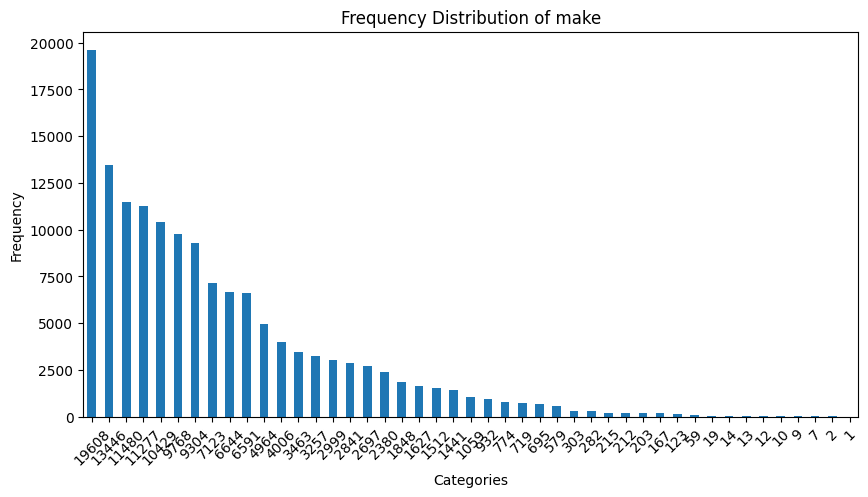

Number of categories sharing each frequency:
count
19608    1
932      1
719      1
695      1
579      1
303      1
282      1
215      1
212      1
203      1
167      1
123      1
59       1
19       1
14       1
13       1
12       1
10       1
9        1
7        1
2        1
774      1
1059     1
13446    1
1441     1
11480    1
11277    1
10429    1
9768     1
9304     1
7123     1
6644     1
6591     1
4964     1
4006     1
3463     1
3257     1
2999     1
2841     1
2697     1
2380     1
1848     1
1627     1
1512     1
1        1
Name: count, dtype: int64
Mean Frequency: 3224.7555555555555
Median Frequency: 1059.0
Standard Deviation of Frequencies: 4505.879442742033

Analyzing column: exterior_color_category


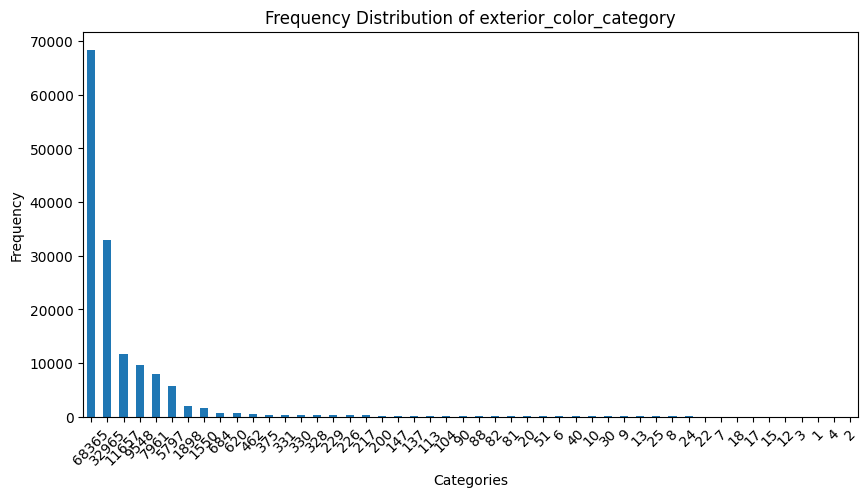

Number of categories sharing each frequency:
count
12       2
40       2
24       2
68365    1
26       1
82       1
81       1
60       1
51       1
42       1
30       1
27       1
25       1
90       1
22       1
21       1
18       1
17       1
15       1
11       1
8        1
88       1
104      1
32965    1
113      1
11657    1
9548     1
7961     1
5797     1
1898     1
1550     1
684      1
620      1
462      1
375      1
331      1
330      1
328      1
229      1
226      1
217      1
200      1
147      1
137      1
4        1
Name: count, dtype: int64
Mean Frequency: 3023.2083333333335
Median Frequency: 89.0
Standard Deviation of Frequencies: 10967.675668649894

Analyzing column: interior_color_category


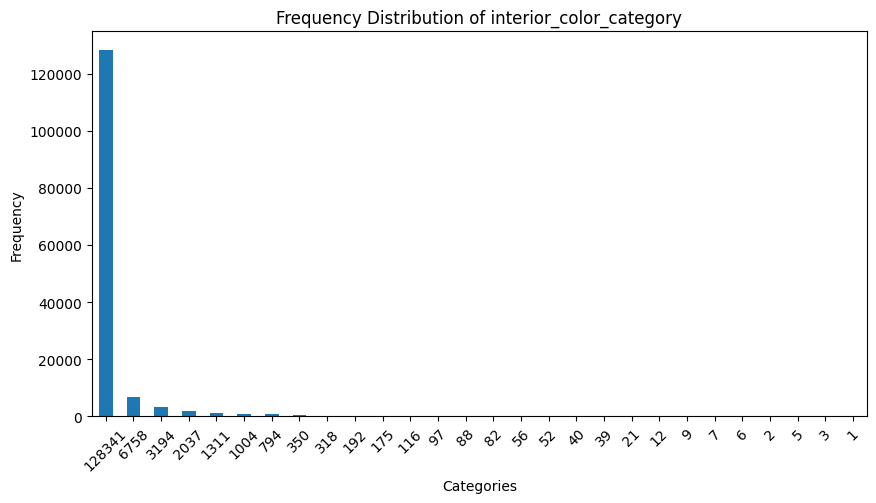

Number of categories sharing each frequency:
count
6         2
128341    1
82        1
3         1
5         1
7         1
9         1
12        1
21        1
39        1
40        1
52        1
56        1
88        1
6758      1
97        1
116       1
175       1
192       1
318       1
350       1
794       1
1004      1
1311      1
2037      1
3194      1
1         1
Name: count, dtype: int64
Mean Frequency: 5182.642857142857
Median Frequency: 85.0
Standard Deviation of Frequencies: 24177.62603334879



In [284]:
# List of categorical columns to analyze (update as needed)
categorical_columns = ['make','exterior_color_category',
                       'interior_color_category']

# Loop through each categorical column
for column in categorical_columns:
    print(f"Analyzing column: {column}")

    # Step 1: Calculate frequency counts
    frequency_counts = df_final[column].value_counts()

    # Step 2: Visualize frequency distribution
    plt.figure(figsize=(10, 5))
    frequency_counts.plot(kind='bar')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Step 3: Analyze frequency groups
    frequency_groups = frequency_counts.value_counts()
    print("Number of categories sharing each frequency:")
    print(frequency_groups)

    # Step 4: Calculate metrics
    mean_frequency = frequency_counts.mean()
    median_frequency = frequency_counts.median()
    std_dev_frequency = frequency_counts.std()

    print(f"Mean Frequency: {mean_frequency}")
    print(f"Median Frequency: {median_frequency}")
    print(f"Standard Deviation of Frequencies: {std_dev_frequency}\n")


In [285]:
print(df_final.dtypes)
df_final.shape
df_final.head()



listing_heading                    int64
dealer_name                        int64
dealer_postal_code                 int64
mileage                            int64
price                            float64
model_year                         int64
make                               int64
model                              int64
style                              int64
has_leather                        int64
has_navigation                     int64
exterior_color_category            int64
interior_color_category            int64
engine_from_vin                    int64
distance_to_dealer               float64
Age                                int64
listing_type_Sold                float64
stock_type_USED                  float64
drivetrain_from_vin_AWD          float64
drivetrain_from_vin_FWD          float64
drivetrain_from_vin_RWD          float64
fuel_type_from_vin_Diesel        float64
fuel_type_from_vin_Electric      float64
fuel_type_from_vin_Gas           float64
fuel_type_from_v

listing_heading  dealer_name  dealer_postal_code  mileage    price  \
0                1            5                   5   230860  11500.0   
1             4490          108                 199    48905   8700.0   
2                2          163                 214   174640   6000.0   
3                2           51                 214   174640   6000.0   
4                1            5                   5   288000   8500.0   

   model_year   make  model  style  has_leather  has_navigation  \
0        1987  13446    282   1745            0               0   
1        1988   1441      1   4090            0               0   
2        1989   1848      3   4090            0               0   
3        1989   1848      3   4090            0               0   
4        1989  13446    282   1745            0               0   

   exterior_color_category  interior_color_category  engine_from_vin  \
0                    11657                   128341                2   
1                    68365                   128341                1   
2                        8                   128341                2   
3                        8                   128341                2   
4                    68365                   128341                2   

   distance_to_dealer  Age  listing_type_Sold  stock_type_USED  \
0                9.84   37                0.0              1.0   
1                8.30   36                1.0              1.0   
2                5.71   35                0.0              1.0   
3                5.71   35                0.0              1.0   
4                9.84   35                0.0              1.0   

   drivetrain_from_vin_AWD  drivetrain_from_vin_FWD  drivetrain_from_vin_RWD  \
0                      0.0                      0.0                      1.0   
1                      0.0                      0.0                      1.0   
2                      0.0                      1.0                      0.0   
3                      0.0                      1.0                      0.0   
4                      0.0                      0.0                      1.0   

   fuel_type_from_vin_Diesel  fuel_type_from_vin_Electric  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   

   fuel_type_from_vin_Gas  fuel_type_from_vin_Hybrid  \
0                     1.0                        0.0   
1                     1.0                        0.0   
2                     1.0                        0.0   
3                     1.0                        0.0   
4                     1.0                        0.0   

   fuel_type_from_vin_Hydrogen  fuel_type_from_vin_PHEV  dealer_city_Devon  \
0                          0.0                      0.0                0.0   
1                          0.0                      0.0                0.0   
2                          0.0                      0.0                0.0   
3                          0.0                      0.0                0.0   
4                          0.0                      0.0                0.0   

   dealer_city_Edmonton  dealer_city_Fort Saskatchewan  dealer_city_Leduc  \
0                   1.0                            0.0                0.0   
1                   1.0                            0.0                0.0   
2                   1.0                            0.0                0.0   
3                   1.0                            0.0                0.0   
4                   1.0                            0.0                0.0   

   dealer_city_Nisku  dealer_city_Sherwood Park  dealer_city_Spruce Grove  \
0                0.0                        0.0                       0.0   
1                0.0                        0.0             

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



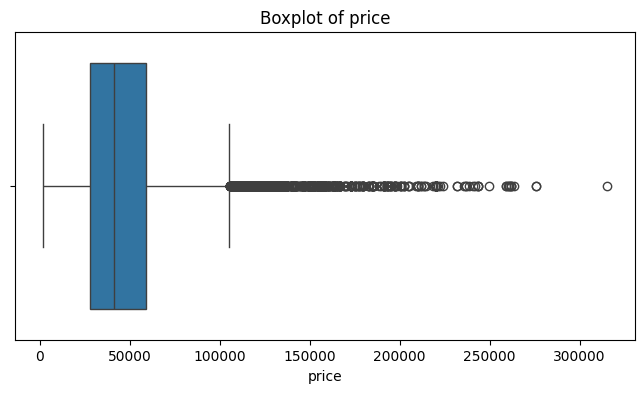

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



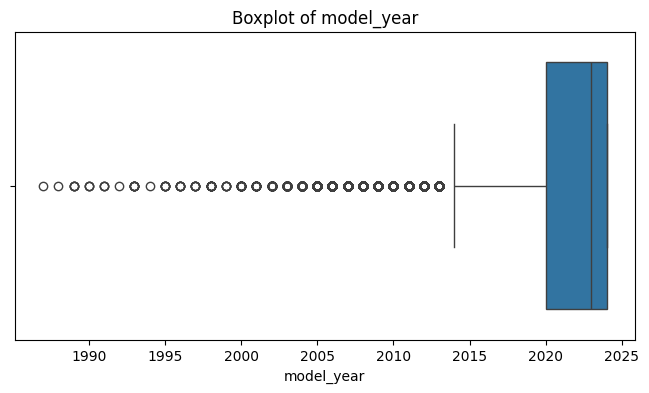

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



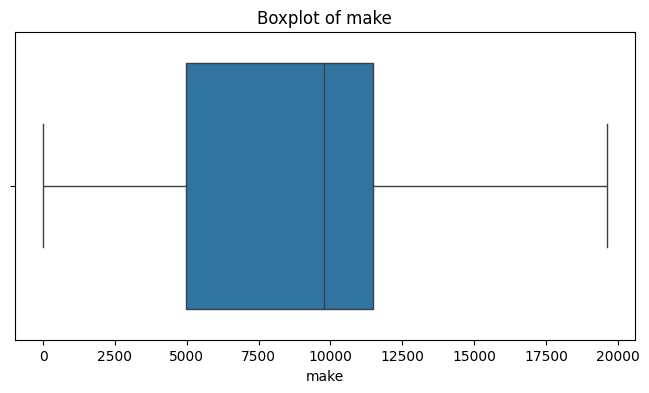

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



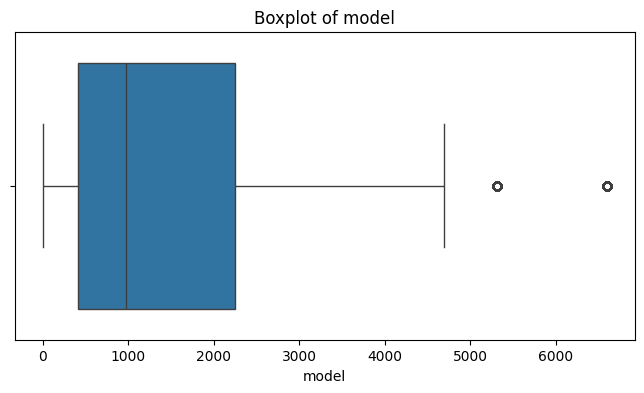

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



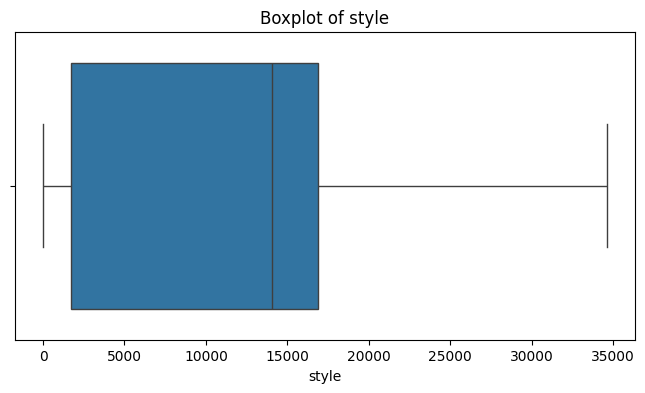

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



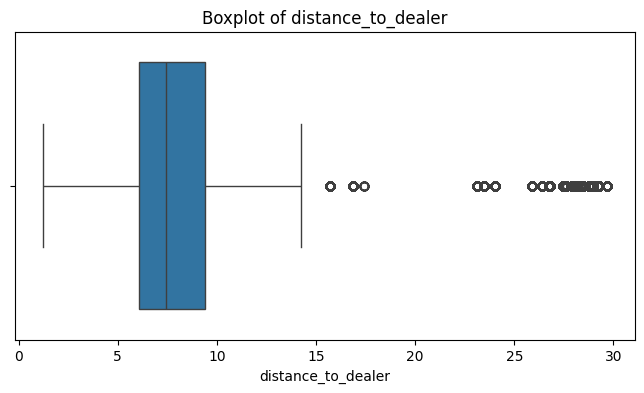

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



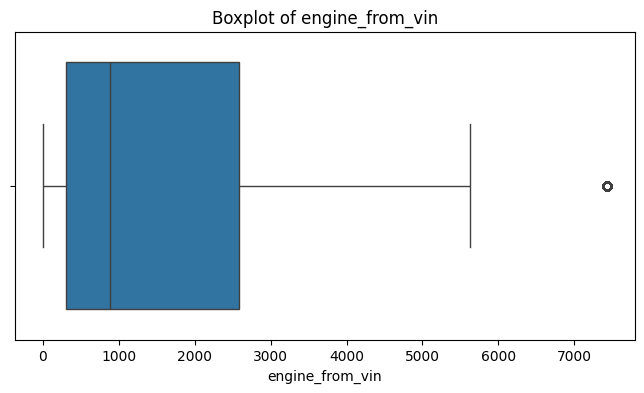

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



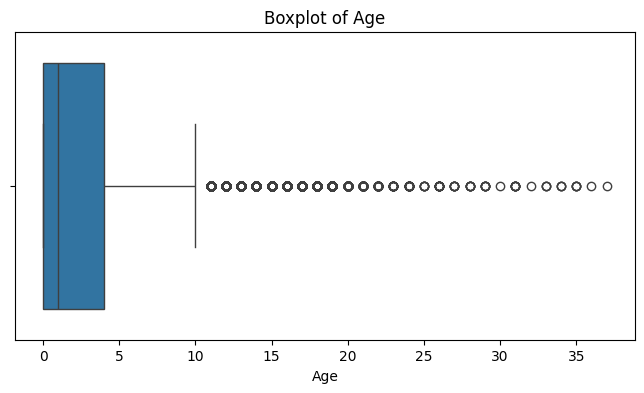

In [286]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical columns
columns =['price', 'model_year', 'make', 'model', 'style',
                        'distance_to_dealer', 'engine_from_vin', 'Age']

for col in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


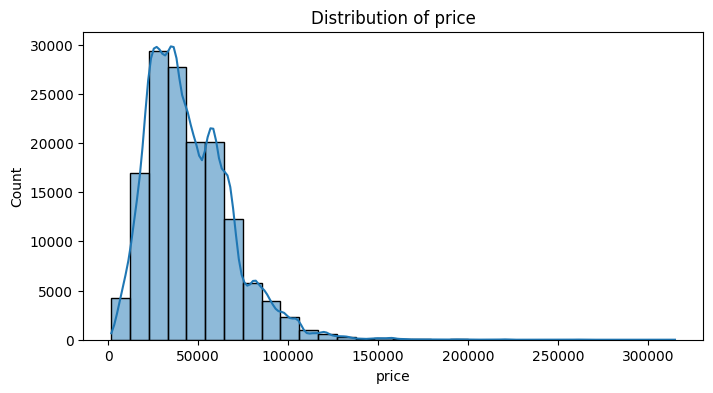

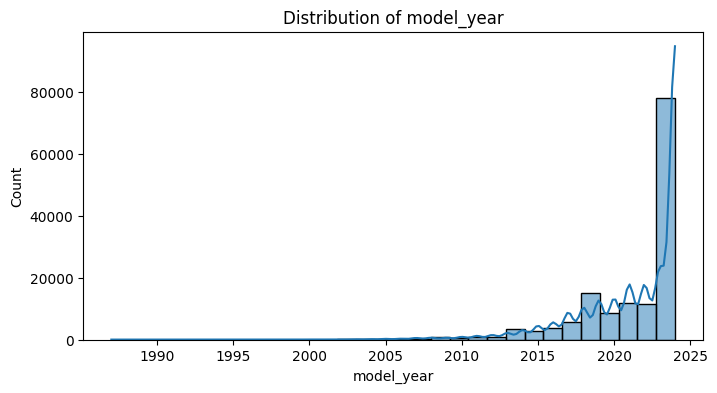

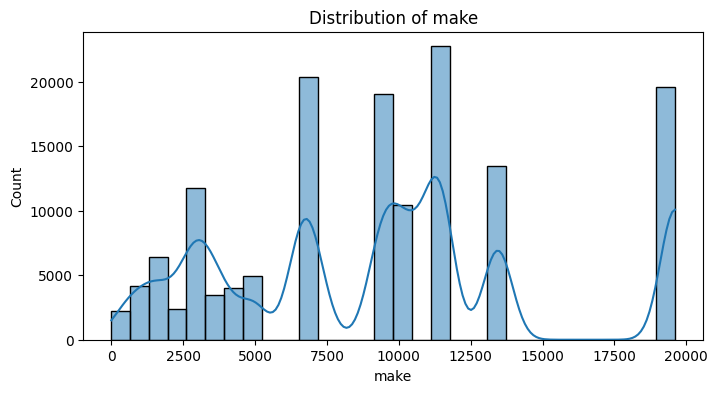

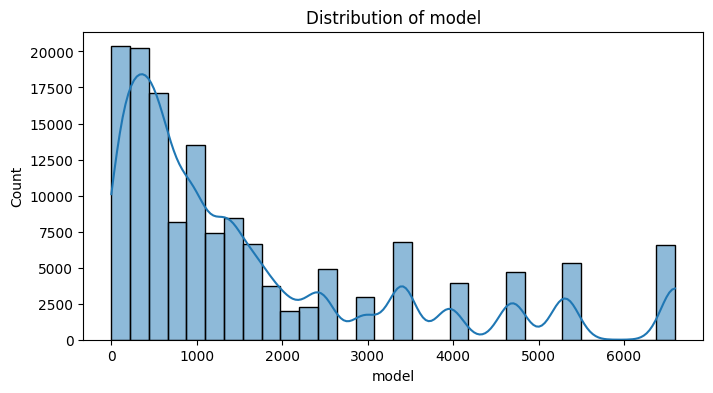

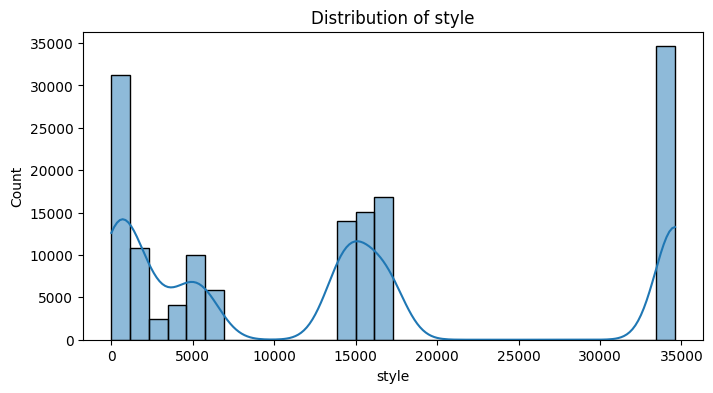

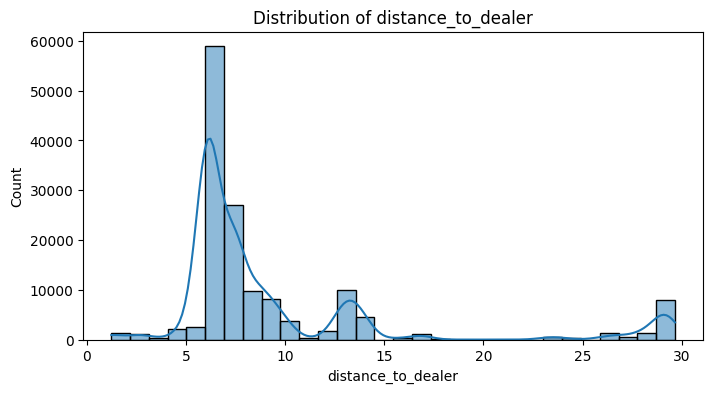

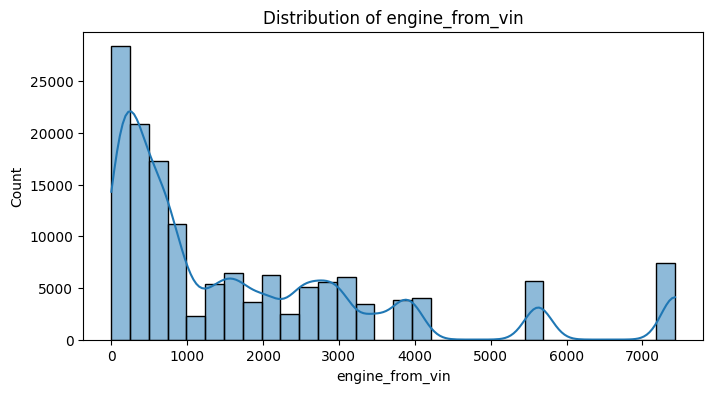

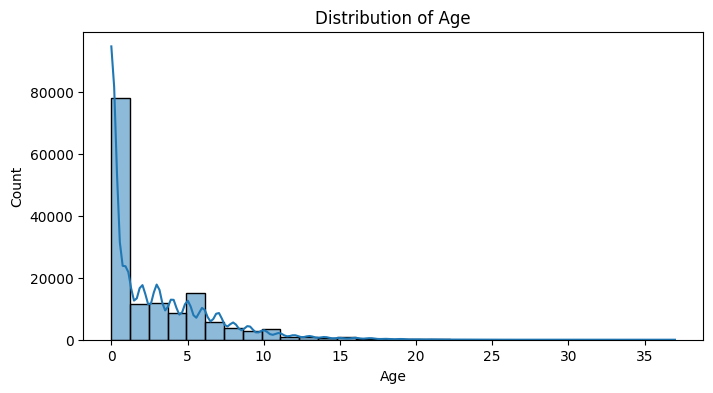

In [287]:
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_final[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [288]:
print(df_final[columns].describe())


               price     model_year           make          model  \
count  145114.000000  145114.000000  145114.000000  145114.000000   
mean    45240.625860    2021.361157    9380.810659    1650.908279   
std     23359.460091       3.542539    5459.790793    1753.267611   
min      1811.000000    1987.000000       1.000000       1.000000   
25%     27980.000000    2020.000000    4964.000000     405.000000   
50%     40995.000000    2023.000000    9768.000000     977.000000   
75%     59045.000000    2024.000000   11480.000000    2245.000000   
max    315100.000000    2024.000000   19608.000000    6596.000000   

               style  distance_to_dealer  engine_from_vin            Age  
count  145114.000000       145114.000000    145114.000000  145114.000000  
mean    14103.505809            9.436435      1741.683807       2.638843  
std     12904.701460            6.226795      1930.425769       3.542539  
min         1.000000            1.230000         1.000000       0.000000  
25%

In [289]:
from sklearn.preprocessing import StandardScaler
def detect_outliers_zscore(df, columns, threshold=3):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns])
    z_scores = np.abs(scaled_data)
    outliers = df[(z_scores > threshold).any(axis=1)]
    return outliers

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Identify columns to treat differently
zscore_columns = ['model_year', 'make', 'style']  # Normal distribution columns according to the data
iqr_columns = ['price', 'mileage', 'model', 'distance_to_dealer', 'engine_from_vin', 'Age']  # Skewed columns (mean i higher than the median)

# Detect outliers using Z-score method for normally distributed columns
zscore_outliers = detect_outliers_zscore(df_final, zscore_columns)

# Detect outliers using IQR method for skewed columns
iqr_outliers = pd.DataFrame()
for col in iqr_columns:
    iqr_outliers = pd.concat([iqr_outliers, detect_outliers_iqr(df_final, col)])

# Combine all detected outliers
all_outliers = pd.concat([zscore_outliers, iqr_outliers]).drop_duplicates()

# Remove the outliers from the dataset
df_clean = df_final.drop(all_outliers.index)
print(f"Number of outliers removed: {len(all_outliers)}")
print(f"Number of rows after removing outliers: {len(df_clean)}")



Number of outliers removed: 35725
Number of rows after removing outliers: 109389


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed 

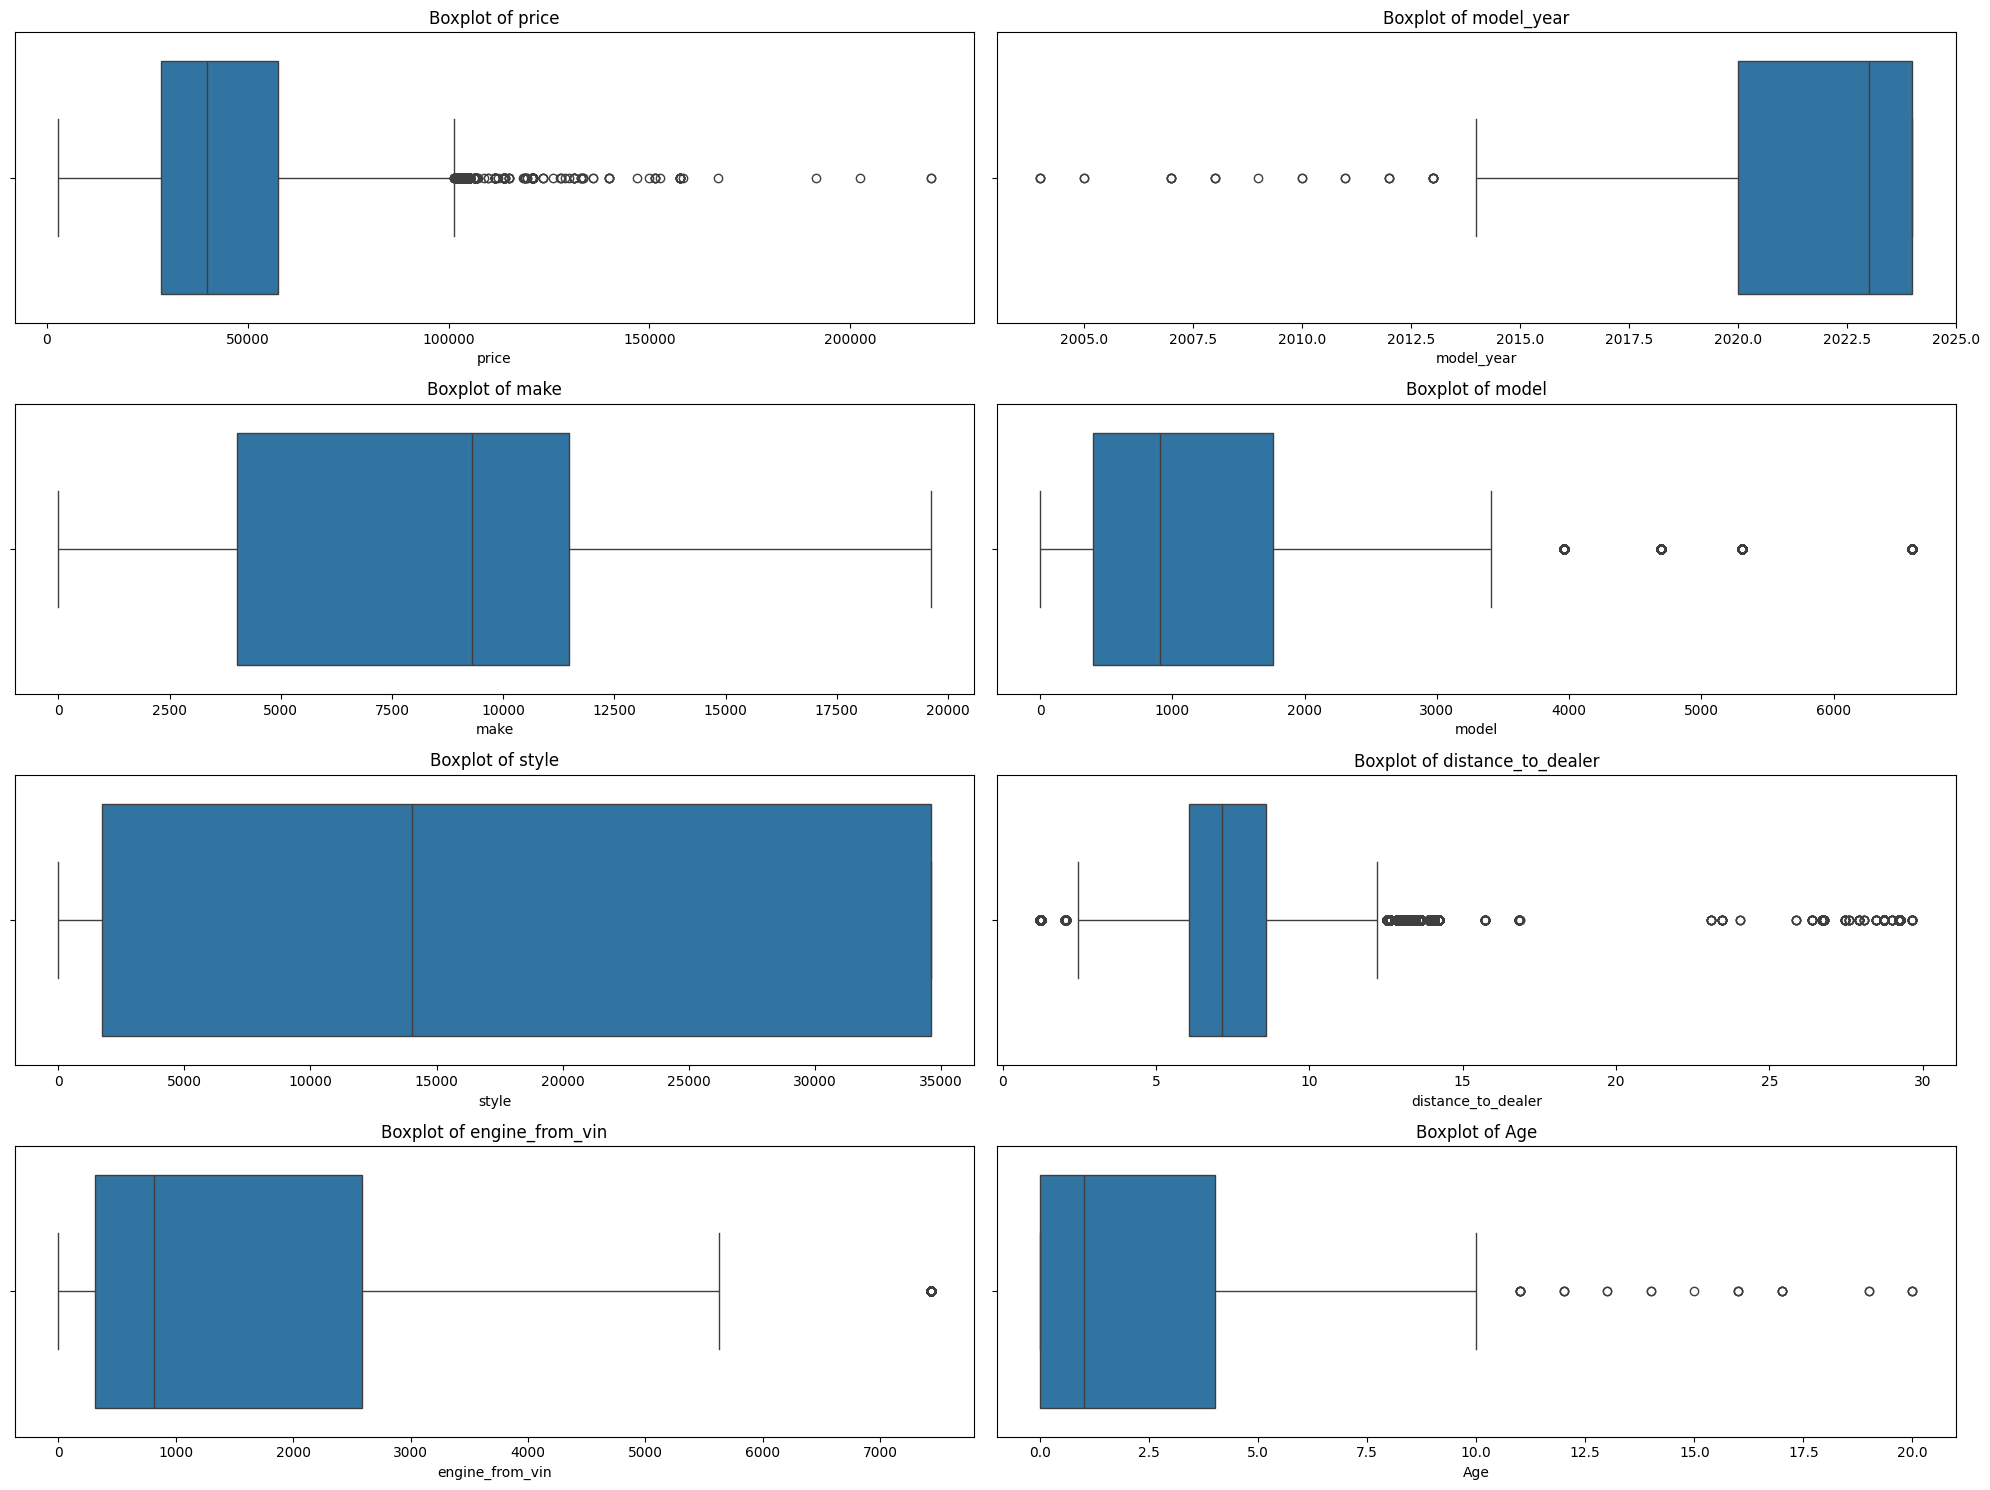

In [290]:
#VISUALIZING AFTER REMOVAL

# Defining the columns for boxplots
boxplot_columns = ['price', 'model_year', 'make', 'model',
                   'style', 'distance_to_dealer', 'engine_from_vin', 'Age']

# Create boxplots for the specified columns
plt.figure(figsize=(20, 15))

for i, column in enumerate(boxplot_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_clean[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [291]:
#STANDARDIZATION
# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical columns to standardize
columns = df_clean.columns
df_clean_original = df_clean.copy()
# Standardize the entire DataFrame
df_clean[columns] = scaler.fit_transform(df_clean[columns])

# Display the first few rows of the standardized DataFrame
print(df_clean.head())



     listing_heading  dealer_name  dealer_postal_code   mileage     price  \
244        -0.188152    -0.826482           -0.866805  5.852189 -1.777564   
271        -0.188152    -0.826482           -0.866805  5.628576  1.111486   
286        -0.188152    -0.826482           -0.866805  4.266079 -1.538899   
393        -0.188152    -0.826482           -0.866805  3.781113 -1.685230   
451        -0.188152    -0.826482           -0.866805  4.421003 -1.831560   

     model_year      make     model     style  has_leather  has_navigation  \
244   -6.646508  2.067699 -1.017073 -0.005456          0.0             0.0   
271   -6.646508 -1.558654 -0.915438 -0.083956          0.0             0.0   
286   -6.646508  0.300347 -0.708259 -1.132468          0.0             0.0   
393   -6.272997  0.173077  0.895231 -0.005456          0.0             0.0   
451   -6.272997 -0.438632 -0.344717 -0.827504          0.0             0.0   

     exterior_color_category  interior_color_category  engine_from_v

In [292]:
import plotly.express as px
# 1. Box Plot: Distribution of Prices by Make
fig1 = px.box(df2, x='make', y='price', title='Price Distribution by Make')
fig1.update_layout(xaxis_title='Make', yaxis_title='Price')
fig1.show()

# 2. Bar Chart: Average Mileage by Make
avg_mileage = df2.groupby('make')['mileage'].mean().reset_index()
fig2 = px.bar(avg_mileage, x='make', y='mileage', title='Average Mileage by Make')
fig2.show()

# 3. Bar Chart: Count of Cars by Make
car_count = df2['make'].value_counts().reset_index()
car_count.columns = ['make', 'count']
fig3 = px.bar(car_count, x='make', y='count', title='Count of Cars by Make')
fig3.show()

# 4. Box Plots for Categorical Variables
fig4 = px.box(df2, x='style', y='price', color='make', title='Price Distribution by Style and Make')
fig4.show()

# 5. Scatter Plot: Price vs Mileage
fig5 = px.scatter(df2, x='price', y='mileage', color='make', title='Price vs Mileage')
fig5.show()


In [293]:
import streamlit as st
import folium
from streamlit_folium import st_folium

# Create a selectbox for user input
make_selection = st.selectbox("Select a car make", df2['make'].unique())

# Filter DataFrame based on user selection
filtered_df = df2[df2['make'] == make_selection]

# Check if 'latitude' and 'longitude' columns exist in the DataFrame
if 'latitude' not in filtered_df.columns or 'longitude' not in filtered_df.columns:
    st.error("Error: 'latitude' or 'longitude' column not found in the DataFrame. Please check your data.")
else:
    # Create a base map
    edmonton_map = folium.Map(location=[53.5461, -113.4938], zoom_start=12)

    # Add markers for each dealer in the filtered DataFrame
    for _, row in filtered_df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=folium.Popup(f"Dealer: {row['dealer_name']}<br>Listing: {row['listing_heading']}", parse_html=True),
            icon=folium.Icon(color='blue')
        ).add_to(edmonton_map)

    # Render the map in Streamlit
    st_folium(edmonton_map, width=725)

2024-10-08 19:59:46.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:46.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:46.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:46.983 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:46.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:46.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:47.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-08 19:59:47.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [294]:
import pandas as pd


# Specify the file path where you want to save the CSV file
#csv_file_path = 'CBB_Listings2g.csv'

# Export the DataFrame to CSV
#df2.to_csv(csv_file_path, index=False)
print(f'Data exported to {csv_file_path}')

NameError: name 'csv_file_path' is not defined